# Gradient Descent

## 1. Gradient Descent for Finding the Minimum of a Function: Example with y = 0.2x²

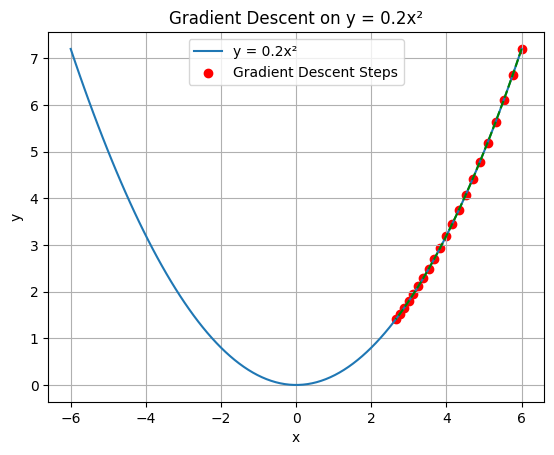

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its derivative
def objective_function(x):
    return 0.2 * x ** 2

def gradient(x):
    return 0.4 * x

# Gradient Descent function
def gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]  # List to store x values

    # List to store corresponding y values
    y_values = [objective_function(initial_x)]  
    x = initial_x
    for i in range(num_iterations):
        grad = gradient(x)  # Calculate the gradient at x

        # Update x by moving in the opposite direction of the gradient
        x = x - learning_rate * grad  
        
        x_values.append(x)
        y_values.append(objective_function(x))
    
    return x_values, y_values

# Parameters for gradient descent
initial_x = 6  # Starting point
learning_rate = 0.1
num_iterations = 20

# Perform gradient descent
x_vals, y_vals = gradient_descent(initial_x, learning_rate, num_iterations)

# Plotting the function and the points traversed by gradient descent
x_plot = np.linspace(-6, 6, 100)
y_plot = objective_function(x_plot)

plt.plot(x_plot, y_plot, label="y = 0.2x²")
plt.scatter(x_vals, y_vals, color="red", label="Gradient Descent Steps")
plt.plot(x_vals, y_vals, color="green", linestyle="--")
plt.title("Gradient Descent on y = 0.2x²")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 2. Gradient descent using PyTorch with autograd to compute the gradients automatically

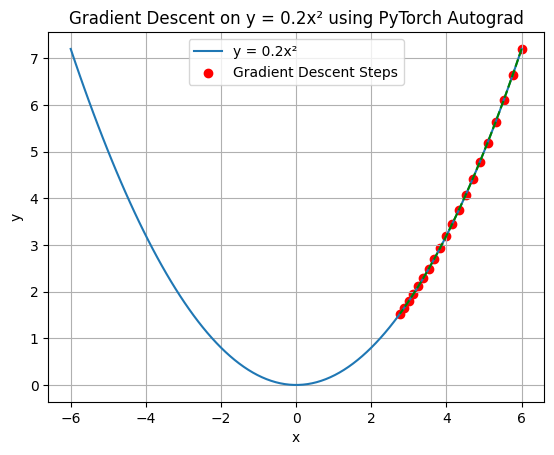

In [3]:
import torch
import matplotlib.pyplot as plt
 
# Define the initial value of x as a torch tensor with gradient tracking enabled
x = torch.tensor([6.0], requires_grad=True)

# Define the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 20

# Lists to store the x and y values during the optimization process
x_values = []
y_values = []

# Gradient descent loop
for i in range(num_iterations):
    # Compute the objective function y = 0.2 * x^2
    y = 0.2 * x ** 2
    
    # Save the current x and y values
    x_values.append(x.item())
    y_values.append(y.item())
    
    # Compute the gradients (backward pass)
    y.backward()
    
    # Update x using the gradient (x = x - learning_rate * gradient)
    with torch.no_grad():
        x -= learning_rate * x.grad
    
    # Zero the gradients for the next iteration
    x.grad.zero_()

# Plot the results
x_plot = torch.linspace(-6, 6, 100)
y_plot = 0.2 * x_plot ** 2

plt.plot(x_plot.numpy(), y_plot.numpy(), label="y = 0.2x²")
plt.scatter(x_values, y_values, color="red", label="Gradient Descent Steps")
plt.plot(x_values, y_values, color="green", linestyle="--")
plt.title("Gradient Descent on y = 0.2x² using PyTorch Autograd")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()